# Projet:
Identifier les facteurs qui influencent les performances commerciales.

## Problématique métier:
Une entreprise souhaite comprendre les intéractions entres ses produits, ses performances régionales et ses marges pour optimiser sa stratégie.

# Résolution du problème

### Importation des packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats 
import scipy.stats as st
import pingouin as pg
#from mlxtend.frequent_patterns import apriori, association_rules


# I- Importation, nettoyage et préparation des données.

## I-1 Importation des données

In [3]:
# Importation des données
df = pd.read_csv("Sample.csv", encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
# Dimension des données
df.shape

(9994, 21)

In [5]:
# Information sur les données.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## I-2 Nettoyage des données

In [6]:
# Recherche des valeurs manquantes
print("Le nombre de valeurs manquantes dans les différentes colonnes est:",df.isnull().sum())

Le nombre de valeurs manquantes dans les différentes colonnes est: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Nos données ne contiennent pas de valeurs manquantes

In [7]:
# Recherche des doublons.
df.duplicated(keep=False).sum()

np.int64(0)

Nos données ne contiennent pas de doublons.

In [8]:
# Vérification des montants de vente
print(f"le  montant de vente minimale est: {df['Sales'].min()}"'€')
print( f"le  montant de vente maximale est: {df['Sales'].max()}"'€')

le  montant de vente minimale est: 0.444€
le  montant de vente maximale est: 22638.48€


## I-3 Préparation des données

In [9]:
df["Order Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype 
--------------  ----- 
9994 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


In [10]:
df["Ship Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Ship Date
Non-Null Count  Dtype 
--------------  ----- 
9994 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


In [11]:
# Conversion de ""Ship Date"" et "Order Date" en format date
df["Order Date"]=pd.to_datetime (df['Order Date'])
df["Ship Date"]=pd.to_datetime (df['Ship Date'])

In [12]:
df.sort_values(by=['Order Date','Ship Date'], ascending=False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
645,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
906,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870


In [13]:
# Calcul de la marge nette
df["Marge Nette"]=(df["Profit"]/df["Sales"])*100
 #Calcul des coûts
df['Cost'] = df['Sales'] - df['Profit']

In [14]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Marge Nette,Cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,19.8516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,16.25,21.1452
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,17.00,76.3268
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.50,239.1828
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,45.00,16.2800


# Analyse Exploratoire des Données (EDA)

##  Analyse des produits

###  Analyse du chiffre d'affaire par produits

In [15]:
#Calcul du chiffre d'affaire total
Chiff_aff_total=df["Sales"].sum()
print("Le chiffre d'affaire total des ventes est de",Chiff_aff_total,"€")

Le chiffre d'affaire total des ventes est de 2297200.8603000003 €


In [16]:
# Nombre total de produit vendu
NbProdVendu = df['Product ID'].nunique()
print("Durant la période étudier", NbProdVendu,"produits différents ont été vendu !")

Durant la période étudier 1862 produits différents ont été vendu !


## Top 10 des produits les plus vendus

In [17]:
Nbprod = df.groupby('Product ID')["Quantity"].count().reset_index()
Nbprod = Nbprod.rename(columns={'Quantity':'NbVendu'})
Nbprod = Nbprod[['Product ID','NbVendu']]
Nbprod.sort_values(by=['NbVendu'], ascending=False).head(10)

,Product ID,NbVendu
1144,OFF-PA-10001970,19
1569,TEC-AC-10003832,18
295,FUR-FU-10004270,16
65,FUR-CH-10001146,15
1566,TEC-AC-10003628,15
93,FUR-CH-10002647,15
1517,TEC-AC-10002049,15
97,FUR-CH-10002880,14
110,FUR-CH-10003774,14
1168,OFF-PA-10002377,14


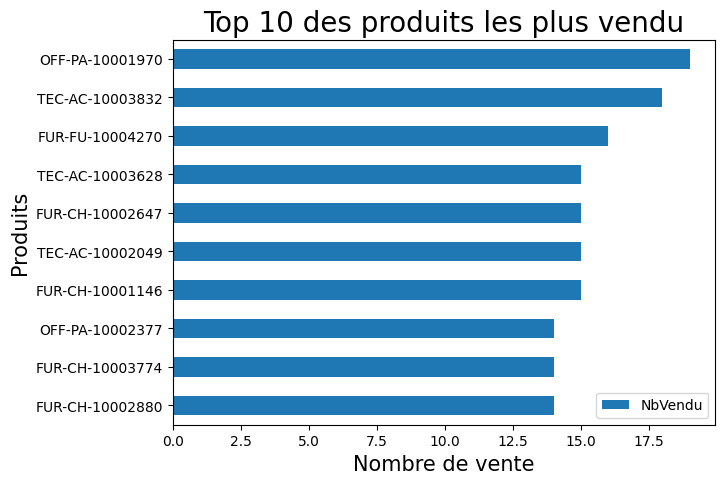

In [18]:
top_10_vente = Nbprod.sort_values(by=['NbVendu'], ascending=False).head(10)
top_10_vente.sort_values(by=["NbVendu"], ascending=True).plot.barh(x = 'Product ID',figsize=(7, 5))
plt.title("Top 10 des produits les plus vendu", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Nombre de vente", size = 15)
plt.show()

In [19]:
# Groupement par 'Product ID' et calcul du chiffre d'affaire
Chiff_aff_prod = df.groupby('Product ID')['Sales'].sum().reset_index()
Chiff_aff_prod = Chiff_aff_prod.rename(columns={'Sales': "Chiffre d'affaire"})
Chiff_aff_prod = Chiff_aff_prod[['Product ID', "Chiffre d'affaire"]]
print("Liste des produits et chiffre d'affaire effectué :")
print(Chiff_aff_prod)

Liste des produits et chiffre d'affaire effectué :
           Product ID  Chiffre d'affaire
0     FUR-BO-10000112            825.174
1     FUR-BO-10000330           1064.624
2     FUR-BO-10000362           2154.348
3     FUR-BO-10000468            723.842
4     FUR-BO-10000711            851.760
...               ...                ...
1857  TEC-PH-10004912            516.530
1858  TEC-PH-10004922           1085.238
1859  TEC-PH-10004924             56.164
1860  TEC-PH-10004959            341.666
1861  TEC-PH-10004977           5291.730

[1862 rows x 2 columns]


## Top 10 des Flop produits

In [20]:
Chiff_aff_prod.sort_values(by=["Chiffre d'affaire"], ascending=True).head(10)

,Product ID,Chiffre d'affaire
418,OFF-AP-10002203,1.624
988,OFF-LA-10003388,5.760
1016,OFF-PA-10000048,6.480
862,OFF-EN-10001535,7.072
606,OFF-AR-10003986,7.700
1239,OFF-PA-10003919,7.968
581,OFF-AR-10003477,8.040
918,OFF-FA-10001754,8.096
616,OFF-AR-10004272,8.400
978,OFF-LA-10002473,9.216


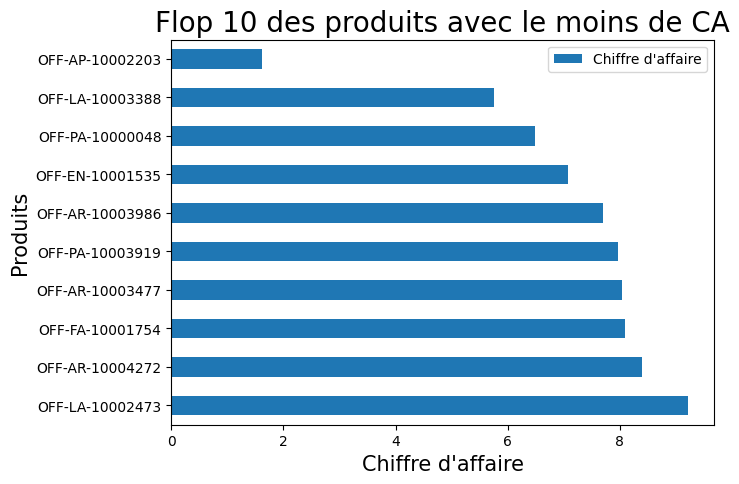

In [21]:
flop_10_Chiff_aff_prod = Chiff_aff_prod.sort_values(by=["Chiffre d'affaire"], ascending=True).head(10)
flop_10_Chiff_aff_prod.sort_values(by=["Chiffre d'affaire"], ascending=False).plot.barh(x = 'Product ID',figsize=(7, 5))
plt.title("Flop 10 des produits avec le moins de CA", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Chiffre d'affaire", size = 15)
plt.show()

## Top 10 des produits ayant les gros chiffres d'affaires

In [22]:
Chiff_aff_prod.sort_values(by=["Chiffre d'affaire"], ascending=False).head(10)

,Product ID,Chiffre d'affaire
1614,TEC-CO-10004722,61599.824
776,OFF-BI-10003527,27453.384
1642,TEC-MA-10002412,22638.480
80,FUR-CH-10002024,21870.576
691,OFF-BI-10001359,19823.479
657,OFF-BI-10000545,19024.500
1604,TEC-CO-10001449,18839.686
1631,TEC-MA-10001127,18374.895
845,OFF-BI-10004995,17965.068
1420,OFF-SU-10000151,17030.312


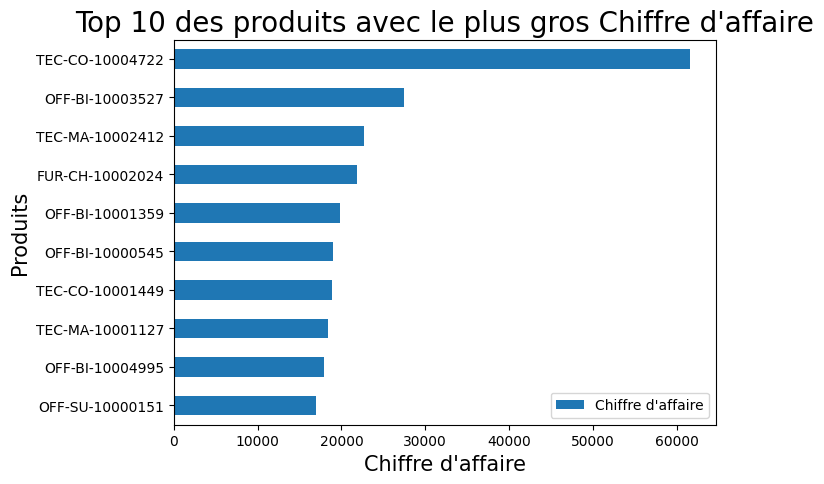

In [23]:
top_10_Chiff_aff_prod = Chiff_aff_prod.sort_values(by=["Chiffre d'affaire"], ascending=False).head(10)
top_10_Chiff_aff_prod.sort_values(by=["Chiffre d'affaire"], ascending=True).plot.barh(x = 'Product ID',figsize=(7, 5))
plt.title("Top 10 des produits avec le plus gros Chiffre d'affaire", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Chiffre d'affaire", size = 15)
plt.show()

Le produit TEC-CO-10004722 est un **Best-Seller** qui atteind presque les **61599.824€** de chiffre d'affaire !

## Répartition de la quantité de produits vendus par catégorie.

In [24]:
# Nombre de produits par catégorie
NbrProdCateg = df.groupby('Category')['Product ID'].nunique()
NbrProdCateg

Category
Furniture           375
Office Supplies    1083
Technology          404
Name: Product ID, dtype: int64

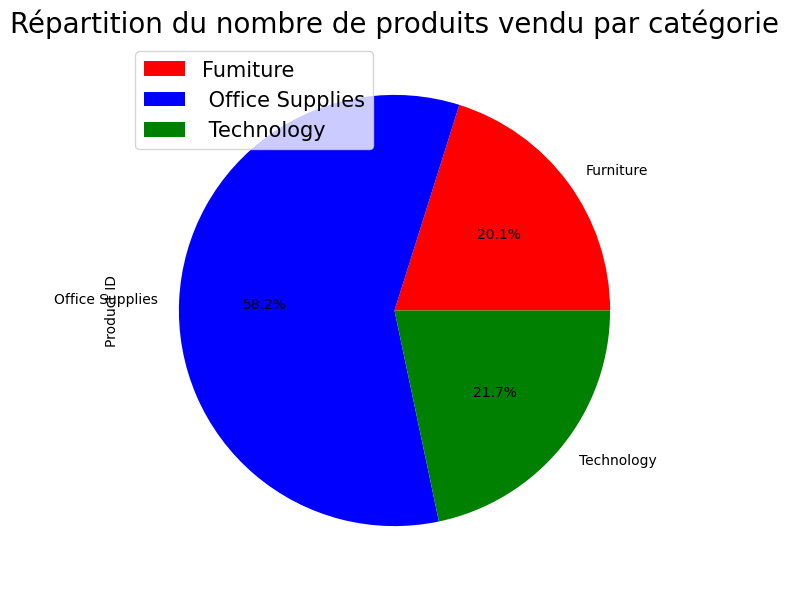

In [25]:
# Répartition des produits par catégorie !
colors = ['red', 'blue', 'green']
NbrProdCateg = df.groupby('Category')['Product ID'].nunique()
NbrProdCateg.plot.pie(colors = colors, figsize=(7, 7), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Fumiture',' Office Supplies',' Technology'], fontsize = 15)
plt.show()

Sur les 1862 produits différents vendus:
- Plus de la moitié  des produits vendu font parti de la catégorie **Office Supplies**, avec plus de 58,2% (1083 produits différents)  produits différents vendus !

- La catégorie **Technology** quant à elle, contient 21.7% (404 produits différents)des différents produits vendus 

- Et pour terminé, 20.1% (375 produits différents)des différents produits vendus appartiennent à la catégorie **Fumiture**.

In [26]:
# Quantité totale de produit vendus
QteProdVendu = df['Quantity'].sum()
print("Durant la période étudier, la quantité de produits vendus est de", QteProdVendu,"produits vendus !")

Durant la période étudier, la quantité de produits vendus est de 37873 produits vendus !


In [27]:
# Quantité totale de produit vendus par catégorie
QteProdCateg = df.groupby('Category')['Quantity'].sum()
QteProdCateg

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

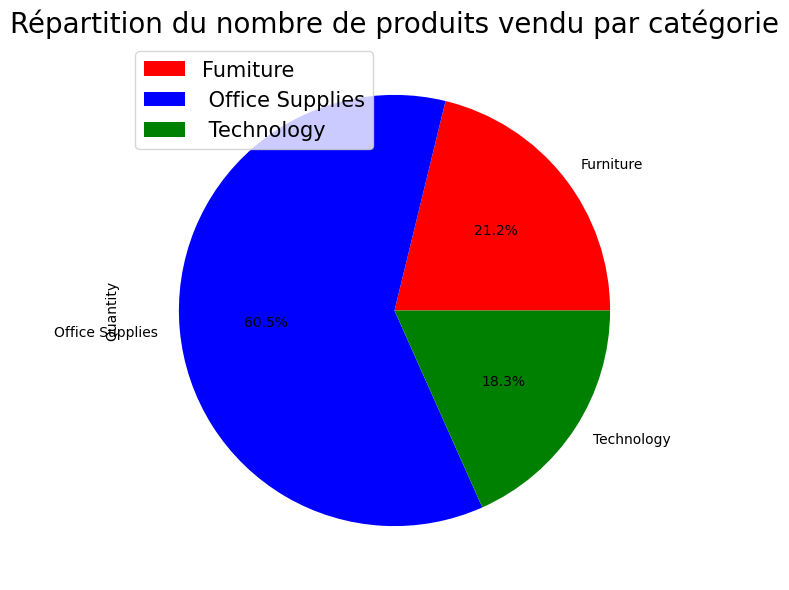

In [28]:
# Quantité de produits vendus
QteProdCateg = df.groupby('Category')['Quantity'].sum()
QteProdCateg.plot.pie(colors = colors, figsize=(7, 7), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Fumiture',' Office Supplies',' Technology'], fontsize = 15)
plt.show()

## Chiffre d'affaire par catégorie

In [29]:
# Calcul du chiffre d'affaire par catégorie
Chiff_aff_categ = df.groupby('Category')['Sales'].sum()
Chiff_aff_categ= round(df.groupby('Category')['Sales'].sum()).reset_index()
Chiff_aff_categ=Chiff_aff_categ.rename(columns={'Sales': "Chiffre d'affaire"})
Chiff_aff_categ

,Category,Chiffre d'affaire
0,Furniture,742000.0
1,Office Supplies,719047.0
2,Technology,836154.0


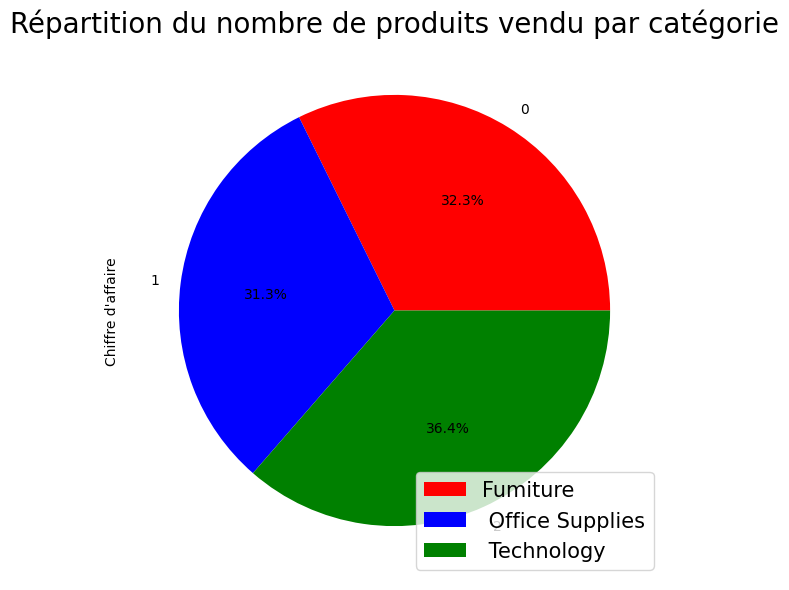

In [30]:
# Repartition du chiffre d'affaire par catégorie
Chiff_aff_categ.plot.pie(y="Chiffre d'affaire", colors = colors, figsize=(7, 7), autopct = "%1.1f%%" )
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Fumiture',' Office Supplies',' Technology'], fontsize = 15)
plt.show()

**Top 1**
- La catégorie **Technology**  avec un chiffre d'affaire de plus de 836154.0€

**Top 2**
- La catégorie **Furniture** avec un chiffre d'affaire proche de 742000.0€

**Top 3**
- La catégorie **Office Supplies** avec un chiffre d'affaire infèrieur à celui de La catégorie **Furniture** avec 719047.0€

## Vente moyenne par catégorie

In [31]:
# Calcul du chiffre d'affaire moyen par catégorie
Moy_Chiff_aff_categ = df.groupby(by=['Category'])
Moy_Chiff_aff_categ = Moy_Chiff_aff_categ[['Sales']].mean().reset_index()
round(Moy_Chiff_aff_categ)

,Category,Sales
0,Furniture,350.0
1,Office Supplies,119.0
2,Technology,453.0


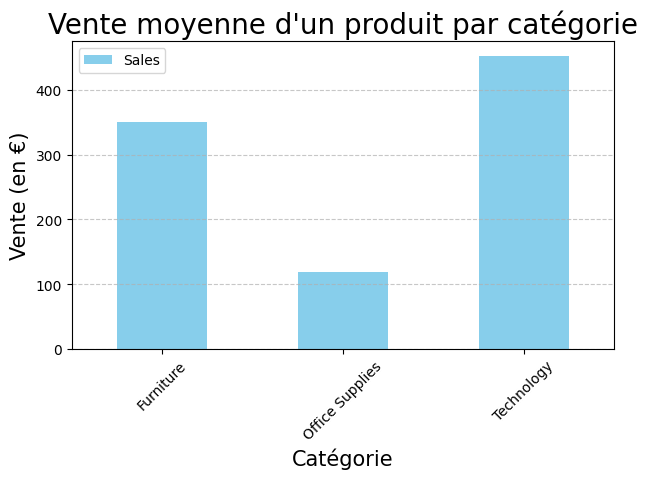

In [32]:
# Visualisation des ventes moyennes par Catégorie
round(Moy_Chiff_aff_categ).plot.bar(x='Category', y='Sales', figsize=(7, 4), color='skyblue')
plt.title("Vente moyenne d'un produit par catégorie", size=20)
plt.ylabel("Vente (en €)", size=15)
plt.xlabel("Catégorie", size=15)
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille pour mieux lire les valeurs
plt.show()

**Vente moyenne par catégorie**:

- Catégorie Furniture : 350.0€
- Catégorie Office Supplies : 119.0€
- Catégorie Technologie: 453.0€

**En analysant la répartition des ventes par catégorie ainsi que les ventes moyenne par catégorie, nous observons que  moins le prix de vente moyen est élevé plus les produits sont vendus !**

### II-A-2/ Analyse des Marges par produits

In [33]:
# La Marge totale des ventes 
Marge_totale_vente=df["Marge Nette"].sum()
print("La Marge totale des ventes est de",Marge_totale_vente,"€")

La Marge totale des ventes est de 120241.74136321196 €


In [34]:
# Groupement par 'Product ID' et calcul des Marges totales par produit
Marge_totale_vente_prod = df.groupby('Product ID')['Marge Nette'].sum().reset_index()
Marge_totale_vente_prod = Marge_totale_vente_prod.rename(columns={'Marge Nette': "Marge totale de vente"})
Marge_totale_vente_prod = Marge_totale_vente_prod[['Product ID', "Marge totale de vente"]]
print("Liste des produits et leur Marge totale  de vente :")
print(Marge_totale_vente_prod)

Liste des produits et leur Marge totale  de vente :
           Product ID  Marge totale de vente
0     FUR-BO-10000112             -14.285714
1     FUR-BO-10000330              11.647059
2     FUR-BO-10000362              49.161765
3     FUR-BO-10000468            -142.000000
4     FUR-BO-10000711              54.000000
...               ...                    ...
1857  TEC-PH-10004912              51.500000
1858  TEC-PH-10004922              68.750000
1859  TEC-PH-10004924              62.750000
1860  TEC-PH-10004959              31.250000
1861  TEC-PH-10004977             124.916667

[1862 rows x 2 columns]


## Top 10 des plus grosses Marges par produits

In [35]:
Marge_totale_vente_prod.sort_values(by=["Marge totale de vente"], ascending=False).head(10)

,Product ID,Marge totale de vente
1144,OFF-PA-10001970,867.75
1168,OFF-PA-10002377,588.75
1566,TEC-AC-10003628,562.00
966,OFF-LA-10001613,547.75
1044,OFF-PA-10000357,517.75
1218,OFF-PA-10003441,502.00
1156,OFF-PA-10002195,498.00
1048,OFF-PA-10000474,497.75
1195,OFF-PA-10002986,476.00
1083,OFF-PA-10001033,475.25


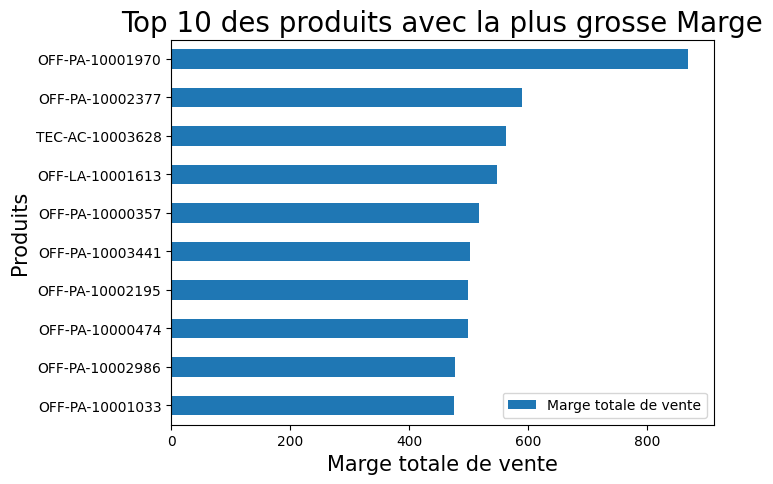

In [36]:
top_10_Marge_totale_vente_prod = Marge_totale_vente_prod.sort_values(by=["Marge totale de vente"], ascending=False).head(10)
top_10_Marge_totale_vente_prod.sort_values(by=["Marge totale de vente"], ascending=True).plot.barh(x = 'Product ID',figsize=(7, 5))
plt.title("Top 10 des produits avec la plus grosse Marge", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Marge totale de vente", size = 15)
plt.show()

# Top 10 des produits avec les plus mauvaise Marges

In [37]:
Marge_totale_vente_prod.sort_values(by=["Marge totale de vente"], ascending=True).head(10)

,Product ID,Marge totale de vente
820,OFF-BI-10004364,-830.416667
429,OFF-AP-10002534,-742.000000
737,OFF-BI-10002429,-712.000000
743,OFF-BI-10002609,-695.000000
764,OFF-BI-10003166,-686.666667
413,OFF-AP-10001947,-678.000000
679,OFF-BI-10001098,-672.500000
783,OFF-BI-10003676,-659.000000
807,OFF-BI-10004140,-647.916667
649,OFF-BI-10000301,-641.666667


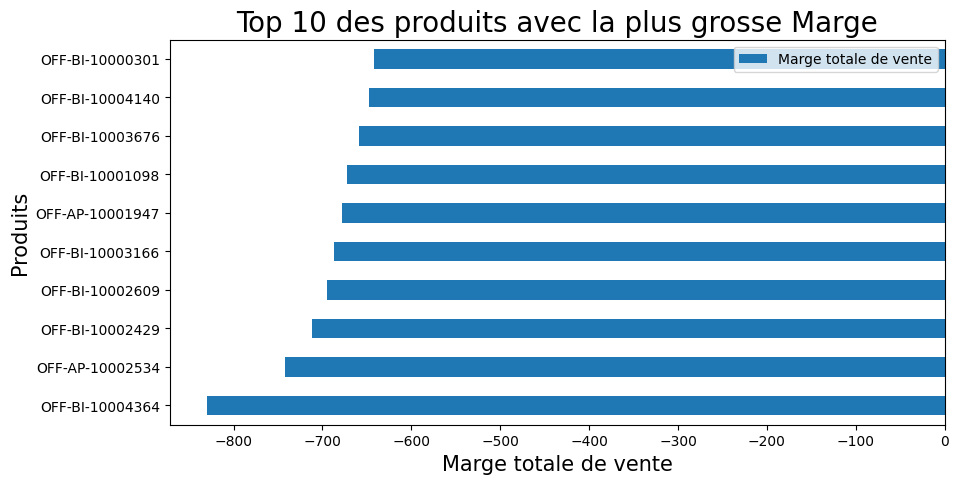

In [38]:
# Top 10 des produits avec les plus mauvaise Marges
top_10_Marge_totale_vente_prod = Marge_totale_vente_prod.sort_values(by=["Marge totale de vente"], ascending=True).head(10)
top_10_Marge_totale_vente_prod.sort_values(by=["Marge totale de vente"], ascending=True).plot.barh(x = 'Product ID',figsize=(10, 5))
plt.title("Top 10 des produits avec la plus grosse Marge", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Marge totale de vente", size = 15)
plt.show()

## II-B/ Analyse Régionale

###  Chiffre d'affaire par région

In [39]:
# Chiffre d'affaires par région
Chiff_aff_par_region = df.groupby('Region')['Sales'].sum().reset_index()
print(Chiff_aff_par_region)

    Region        Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


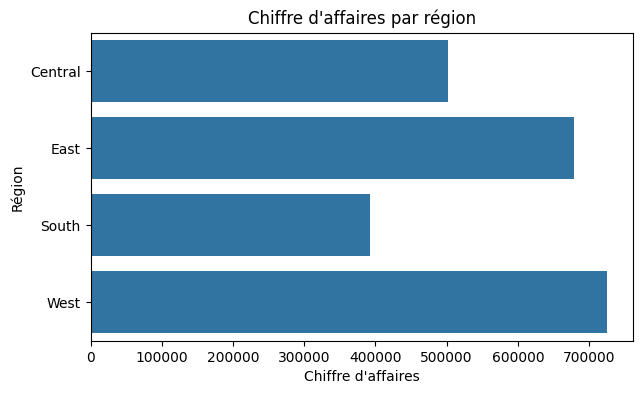

In [40]:
# Chiffre d'affaires par région
plt.figure(figsize=(7, 4))
sns.barplot(x='Sales', y='Region', data=Chiff_aff_par_region)
plt.title('Chiffre d\'affaires par région')
plt.xlabel('Chiffre d\'affaires')
plt.ylabel('Région')
plt.show()


- La région **West** génère le plus de chiffre d'affaires (725457.8245€), suivie de **East** ( 678781.2400€) et **Central** (501239.8908€).

- La région **South** est la moins performante en termes de ventes (391721.9050€)

### Part de marché par région

In [41]:
Chiff_aff_par_region['Part de marche (%)'] = round((Chiff_aff_par_region['Sales'] / Chiff_aff_total) * 100)
print(Chiff_aff_par_region[['Region', 'Part de marche (%)']])

    Region  Part de marche (%)
0  Central                22.0
1     East                30.0
2    South                17.0
3     West                32.0


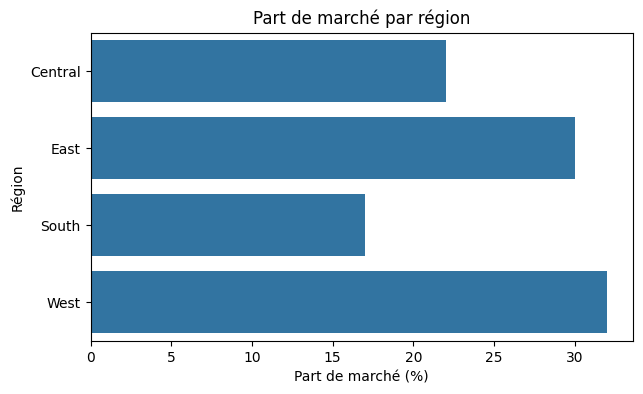

In [42]:
# Part de marché par région
plt.figure(figsize=(7, 4))
sns.barplot(x='Part de marche (%)', y='Region', data=Chiff_aff_par_region)
plt.title('Part de marché par région')
plt.xlabel('Part de marché (%)')
plt.ylabel('Région')
plt.show()


- La région **West** détient la plus grande part de marché (32 %), suivie de **East** (30 %) et **Central** (22 %).

- La région **South** a la plus petite part de marché (17 %).

### Performance Comparée par région

In [43]:
# Calcul des indicateurs par région
performance_par_region =round(df.groupby('Region').agg({
    'Sales': 'sum',          
    'Profit': 'sum',         
    'Quantity': 'sum',       
    'Marge Nette': 'mean'          
}).reset_index())
performance_par_region['Part de marché (%)'] = round((performance_par_region['Sales'] / Chiff_aff_total) * 100)
print(performance_par_region)

    Region     Sales    Profit  Quantity  Marge Nette  Part de marché (%)
0  Central  501240.0   39706.0      8780        -10.0                22.0
1     East  678781.0   91523.0     10618         17.0                30.0
2    South  391722.0   46749.0      6209         16.0                17.0
3     West  725458.0  108418.0     12266         22.0                32.0


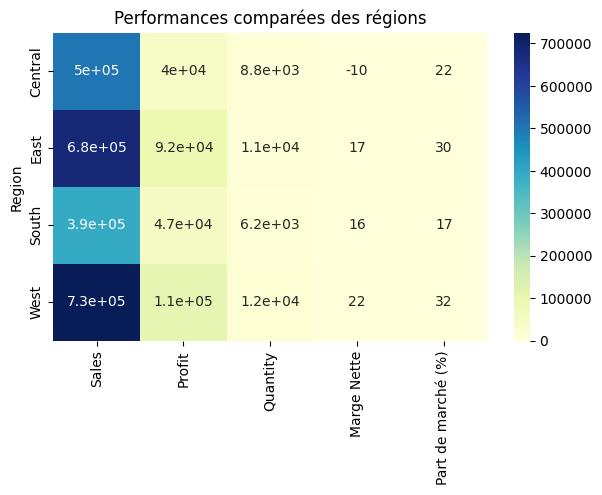

In [44]:
# Performances comparées des régions (heatmap)
plt.figure(figsize=(7, 4))
sns.heatmap(performance_par_region.set_index('Region'), annot=True, cmap='YlGnBu')
plt.title('Performances comparées des régions')
plt.show()

- La région **West** détient la plus grande Marge moyenne (22€), suivie de **East** (17€) et **Central** (16€).

- La région **South** a une marge moyenne  négative (-10€).

- La région **West** domine en termes de chiffre d'affaires, de profit et de quantité vendue.

- La région **South** est la moins performante sur tous les indicateurs.



# II-C/ Analyse des Marges

### Distribution des Marges

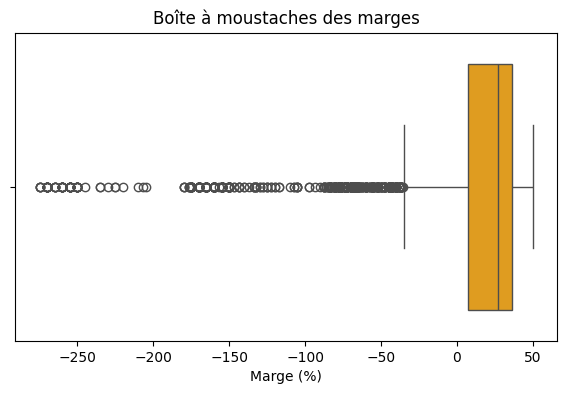

In [45]:
 #Boîte à moustaches des marges
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Marge Nette'], color='orange')
plt.title('Boîte à moustaches des marges')
plt.xlabel('Marge (%)')
plt.show()

Nous observons des valeurs abberantes négatives, ce qui signifie que nous avons des produits non rentable. 

### Impacte des couts sur la marge

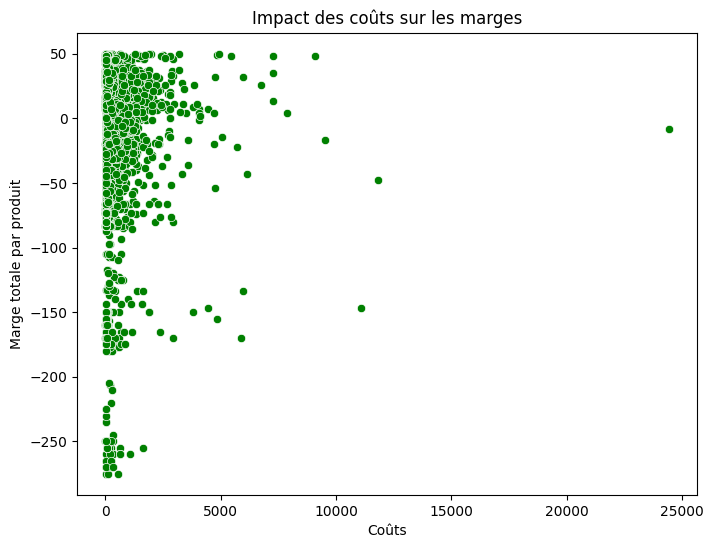

In [46]:


# Graphique de dispersion : Coûts vs Marges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Cost'], y=df['Marge Nette'], color='green')
plt.title('Impact des coûts sur les marges')
plt.xlabel('Coûts')
plt.ylabel('Marge totale par produit')
plt.show()

### Corrélation entre prix de vente et marges

In [47]:
#Calcul de la corrélation entre Sales et Marge
correlation = df['Sales'].corr(df['Marge Nette'])

print(f"Corrélation entre prix de vente et marges : {correlation:.2f}")


Corrélation entre prix de vente et marges : 0.00


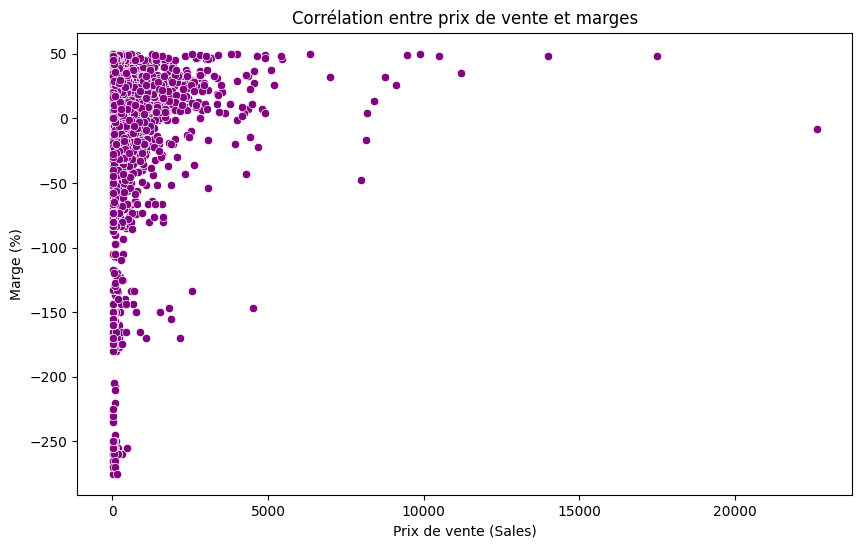

In [48]:
# Graphique de dispersion : Prix de vente vs Marges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Sales'], y=df['Marge Nette'], color='purple')
plt.title('Corrélation entre prix de vente et marges')
plt.xlabel('Prix de vente (Sales)')
plt.ylabel('Marge (%)')
plt.show()

# Analyse des intéractions entre les produits, performances régionales et les marges.

### Analyse de corrélation entre les produits et les performances régionale.

In [49]:
# Fonction de vérification de la p-value

def test_p_values(p):
    if p > 0.05:
        print("Variables indépendantes, car p-value > 5% ")
        print("Donc les 2 variables ne sont pas corréler !")
        print("p-value :",p)
    else:
        print("On rejète H0, car p-value < 5%")
        print("Donc les 2 variables sont corréler !")
        print("p-value :",p)

In [50]:
# Quantité vendu par produit et par région
df.groupby(['Category','Region'], as_index=False).agg(
   Quntité_vendu=("Quantity","sum")
)

,Category,Region,Quntité_vendu
0,Furniture,Central,1827
1,Furniture,East,2214
2,Furniture,South,1291
3,Furniture,West,2696
4,Office Supplies,Central,5409
5,Office Supplies,East,6462
6,Office Supplies,South,3800
7,Office Supplies,West,7235
8,Technology,Central,1544
9,Technology,East,1942


In [51]:
# Analyse du lien entre le produit et la région de vente. Analyse Quantitatif/Quantitatif
X = "Category"
Y = "Region"

Prod_Reg = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Prod_Reg

Region,Central,East,South,West,Total
Category,,,,,
Furniture,481,601,332,707,2121
Office Supplies,1422,1712,995,1897,6026
Technology,420,535,293,599,1847
Total,2323,2848,1620,3203,9994


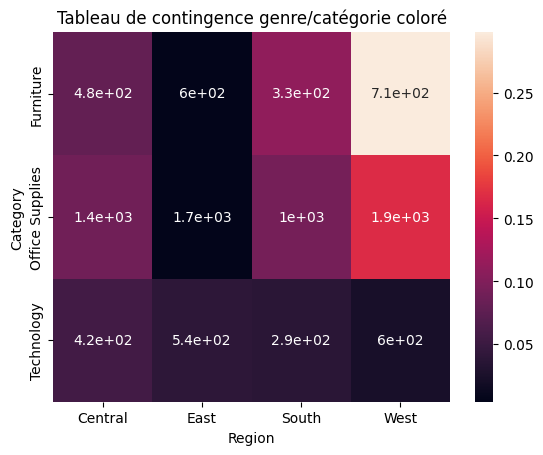

In [52]:
# Head map
tx = Prod_Reg.loc[:,["Total"]]
ty = Prod_Reg.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = Prod_Reg.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Tableau de contingence genre/catégorie coloré")
plt.show()

In [53]:
# Le lien entre le genre d'un client et les catégories de livres achetés - Analyse QUALITATIF / QUALITATIF

Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(Prod_Reg)
print(Khi2_obs)
test_p_values(p_value)

3.661930938326572
Variables indépendantes, car p-value > 5% 
Donc les 2 variables ne sont pas corréler !
p-value : 0.9887935824497435


### Analyse de corrélation entre les produits et les marges.

In [54]:
# Groupement par produit, catégorie et Marge.
Marge_Total_Categ_Groupe=df.groupby(['Category','Product ID'], as_index=False).agg(
   Marge_Total=("Marge Nette","sum")
)
Marge_Total_Categ_Groupe = Marge_Total_Categ_Groupe.rename(columns={'Marge Nette':'Marge Totale'})
Marge_Total_Categ_Groupe= Marge_Total_Categ_Groupe.reset_index()
Marge_Total_Categ_Groupe



,index,Category,Product ID,Marge_Total
0,0,Furniture,FUR-BO-10000112,-14.285714
1,1,Furniture,FUR-BO-10000330,11.647059
2,2,Furniture,FUR-BO-10000362,49.161765
3,3,Furniture,FUR-BO-10000468,-142.000000
4,4,Furniture,FUR-BO-10000711,54.000000
...,...,...,...,...
1857,1857,Technology,TEC-PH-10004912,51.500000
1858,1858,Technology,TEC-PH-10004922,68.750000
1859,1859,Technology,TEC-PH-10004924,62.750000
1860,1860,Technology,TEC-PH-10004959,31.250000


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_3224\4152056381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,


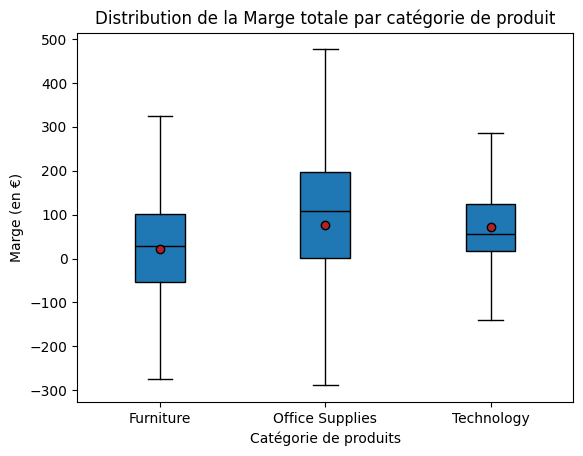

In [55]:
# Création de liste contenant les marges pour chaque Categorie
X = "Category" # qualitative
Y = "Marge_Total" # quantitative
modalites = Marge_Total_Categ_Groupe[X].unique()
groupes = []
for m in modalites:
    groupes.append(Marge_Total_Categ_Groupe[Marge_Total_Categ_Groupe[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution de la Marge totale par catégorie de produit")
plt.ylabel("Marge (en €)")
plt.xlabel("Catégorie de produits")
plt.show()

In [56]:
A = Marge_Total_Categ_Groupe['Marge_Total'][Marge_Total_Categ_Groupe['Category'] == 'Technology']
B = Marge_Total_Categ_Groupe['Marge_Total'][Marge_Total_Categ_Groupe['Category'] == 'Furniture']
C = Marge_Total_Categ_Groupe['Marge_Total'][Marge_Total_Categ_Groupe['Category'] == 'Office Supplies']


#perform Bartlett's test 
stats.bartlett(A, B, C)

BartlettResult(statistic=np.float64(294.78981605634425), pvalue=np.float64(9.709676993848877e-65))